In [28]:
! pip install numpy

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Question 1:                 
Write a NumPy program to calculate cumulative sum of the elements along a given axis, sum over rows for each of the 3 columns and sum over columns for each of the 2 rows of a given 3x3 arr1ay.                
Sample output:              
Original arr1ay:             
[[1 2 3]              
[4 5 6]]                                               
Cumulative sum of the elements along a given axis:                   
[ 1 3 6 10 15 21]                            
Sum over rows for each of the 3 columns:                     
[[1 2 3]                 
[5 7 9]]                                    
Sum over columns for each of the 2 rows:                    
[[ 1 3 6]                       
[ 4 9 15]]


In [30]:
arr1 = np.array([[1,2,3],[4,5,6]])
arr1

array([[1, 2, 3],
       [4, 5, 6]])

In [31]:
cumul_sum = np.cumsum(arr1)
cumul_sum

array([ 1,  3,  6, 10, 15, 21])

In [32]:
row_sum = np.cumsum(arr1,axis=0)
row_sum

array([[1, 2, 3],
       [5, 7, 9]])

In [33]:
col_sum = np.cumsum(arr1,axis=1)
col_sum

array([[ 1,  3,  6],
       [ 4,  9, 15]])

Question 2:             
Write a NumPy program which first create a 5x5 array with random values between 1 and 100 and then apply the below operations on it.            
1. Swap the first and last rows of the array.           
2. Replace the minimum value in the entire array with 0.            
3. Subtract the mean of each row from each element of the row. 

In [34]:
arr2 = np.random.randint(1,101,25).reshape(5,5)
arr2

array([[99,  2, 85, 86, 14],
       [84, 83, 56, 58, 43],
       [16, 70, 52, 21, 64],
       [71, 77, 30, 57,  9],
       [46, 43, 49, 38, 54]], dtype=int32)

In [35]:
# sarr2 = arr2
arr2[[0,-1]] = arr2[[-1,0]]
print('Swapped array 2:\n', arr2)

Swapped array 2:
 [[46 43 49 38 54]
 [84 83 56 58 43]
 [16 70 52 21 64]
 [71 77 30 57  9]
 [99  2 85 86 14]]


In [36]:
np.min(arr2)

np.int32(2)

In [37]:
np.min(arr2)
arr2[arr2 == np.min(arr2)] = 0
arr2

array([[46, 43, 49, 38, 54],
       [84, 83, 56, 58, 43],
       [16, 70, 52, 21, 64],
       [71, 77, 30, 57,  9],
       [99,  0, 85, 86, 14]], dtype=int32)

In [38]:
rw_mean=np.mean(arr2,axis=1)
print("Mean of each row in arr2: ", rw_mean)
arr2 = arr2-rw_mean
arr2

Mean of each row in arr2:  [46.  64.8 44.6 48.8 56.8]


array([[  0. , -21.8,   4.4, -10.8,  -2.8],
       [ 38. ,  18.2,  11.4,   9.2, -13.8],
       [-30. ,   5.2,   7.4, -27.8,   7.2],
       [ 25. ,  12.2, -14.6,   8.2, -47.8],
       [ 53. , -64.8,  40.4,  37.2, -42.8]])

Question 3:                                                                 
Using a given array make a different array as in below example                                          
Given: array = [1,2,3]                                  
result array -> [1 1 1 2 2 2 3 3 3]                     
• Internal repeating should be as length of the array.

In [39]:
arr3 = [1,2,3]
arr4 = [i for i in arr3 for _ in range(len(arr3))]
print(arr3,arr4)

[1, 2, 3] [1, 1, 1, 2, 2, 2, 3, 3, 3]


# Question 4

In [40]:
df = pd.read_csv('car_price_prediction_.csv')
df.head()

Car ID  Brand  Year  Engine Size Fuel Type Transmission  Mileage Condition  \
0       1  Tesla  2016          2.3    Petrol       Manual   114832       New   
1       2    BMW  2018          4.4  Electric       Manual   143190      Used   
2       3   Audi  2013          4.5  Electric       Manual   181601       New   
3       4  Tesla  2011          4.1    Diesel    Automatic    68682       New   
4       5   Ford  2009          2.6    Diesel       Manual   223009  Like New   

      Price     Model  
0  26613.92   Model X  
1  14679.61  5 Series  
2  44402.61        A4  
3  86374.33   Model Y  
4  73577.10   Mustang

Q1. How many cars belong to each condition category (New, Used, Like New)?

In [41]:
df['Condition'].value_counts()

Condition
Used        855
Like New    836
New         809
Name: count, dtype: int64

Q2. What is the average price of cars for each brand?

In [43]:
df.groupby('Brand')['Price'].mean()

Brand
Audi        51953.424810
BMW         54157.114385
Ford        51593.254813
Honda       52050.283949
Mercedes    53191.090085
Tesla       53475.547471
Toyota      52078.728235
Name: Price, dtype: float64

Q3. How many unique car models exist for each brand?

In [47]:
df.groupby('Brand')['Model'].nunique()

Brand
Audi        4
BMW         4
Ford        4
Honda       4
Mercedes    4
Tesla       4
Toyota      4
Name: Model, dtype: int64

Q4. Which transmission type (Manual or Automatic) is the most common, and how many cars have this type?

In [54]:
transmissin_count=df['Transmission'].value_counts()
transmissin_count

Transmission
Manual       1308
Automatic    1192
Name: count, dtype: int64

In [56]:
print(f'{transmissin_count.idxmax()} has:{transmissin_count.max()}, which is most common')

Manual has:1308, which is most common


Q5. What is the minimum and maximum mileage of cars that use Diesel fuel?

In [58]:
disel_cars = df[df['Fuel Type']=='Diesel']
disel_cars.head()

Car ID  Brand  Year  Engine Size Fuel Type Transmission  Mileage  \
3        4  Tesla  2011          4.1    Diesel    Automatic    68682   
4        5   Ford  2009          2.6    Diesel       Manual   223009   
5        6   Audi  2019          2.4    Diesel    Automatic   246553   
10      11  Tesla  2001          1.8    Diesel    Automatic   298875   
22      23  Honda  2012          3.3    Diesel       Manual   275550   

   Condition     Price    Model  
3        New  86374.33  Model Y  
4   Like New  73577.10  Mustang  
5   Like New  88969.76       Q7  
10  Like New  58872.60  Model 3  
22       New  54210.22     CR-V

In [75]:
print(f'Min: {disel_cars['Mileage'].min()}, Max: {disel_cars['Mileage'].max()}')

Min: 36, Max: 299854


Q6. Calculate the average price of cars listed in each year from the dataset.

In [76]:
df.groupby('Year')['Price'].mean()

Year
2000    53094.163441
2001    48944.057706
2002    57197.476000
2003    52260.187373
2004    51517.976900
2005    57534.323592
2006    53437.595930
2007    56464.203545
2008    53104.788716
2009    52932.735778
2010    53650.244632
2011    51414.871188
2012    57092.138378
2013    52495.034737
2014    54202.577248
2015    51516.460909
2016    51977.464068
2017    49045.689175
2018    52640.946604
2019    49848.339029
2020    48281.739426
2021    48819.715089
2022    54656.139554
2023    51328.692718
Name: Price, dtype: float64

In [78]:
df.head()

Car ID  Brand  Year  Engine Size Fuel Type Transmission  Mileage Condition  \
0       1  Tesla  2016          2.3    Petrol       Manual   114832       New   
1       2    BMW  2018          4.4  Electric       Manual   143190      Used   
2       3   Audi  2013          4.5  Electric       Manual   181601       New   
3       4  Tesla  2011          4.1    Diesel    Automatic    68682       New   
4       5   Ford  2009          2.6    Diesel       Manual   223009  Like New   

      Price     Model  
0  26613.92   Model X  
1  14679.61  5 Series  
2  44402.61        A4  
3  86374.33   Model Y  
4  73577.10   Mustang

Q7. What is the average price difference between cars in "New" condition and
"Used" condition?

In [86]:
max_price = df['Condition'].value_counts().max()
min_price = df['Condition'].value_counts().min()
print(f'Average price difference btw: {max_price-min_price}')

Average price difference btw: 46


Q8. Find the most expensive car for each brand and its price.

In [90]:
prices = df.groupby('Brand')['Price'].max()
print(f'Folowing are the max prices:\n{prices}')

Folowing are the max prices:
Brand
Audi        99982.59
BMW         99968.62
Ford        99605.33
Honda       99578.74
Mercedes    99754.42
Tesla       99905.90
Toyota      99400.47
Name: Price, dtype: float64


Q9. For each condition category (New, Used, Like New), calculate the average
mileage. Which condition has the highest average mileage?

In [101]:
df.groupby('Condition')['Mileage'].mean().sort_values(ascending=False)

Condition
Like New    151986.429426
New         148667.967862
Used        148586.632749
Name: Mileage, dtype: float64

In [102]:
print('Like New has highest mileage of : 151986.429426')

Like New has highest mileage of : 151986.429426


Q10. Plot the distribution of car prices. Is the distribution skewed?


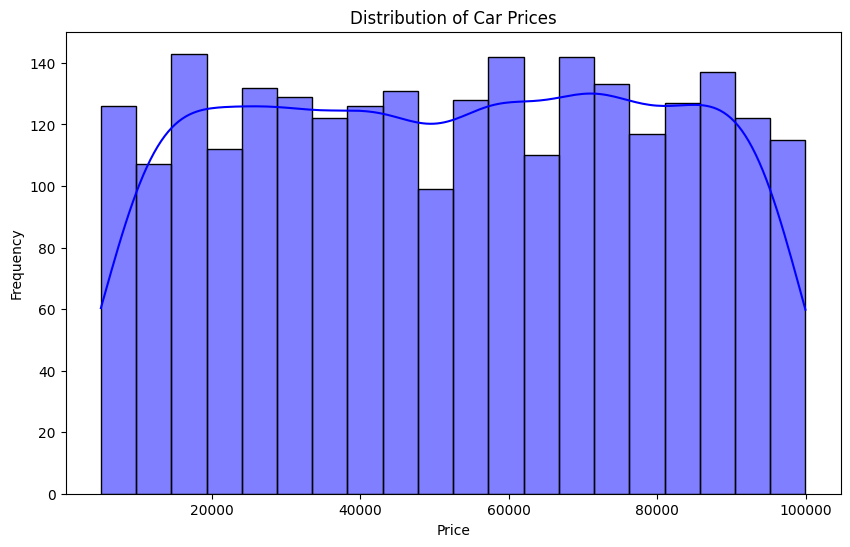

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['Price'], kde=True, color='blue', bins=20)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Q12. Create a bar chart showing the count of cars for each brand.


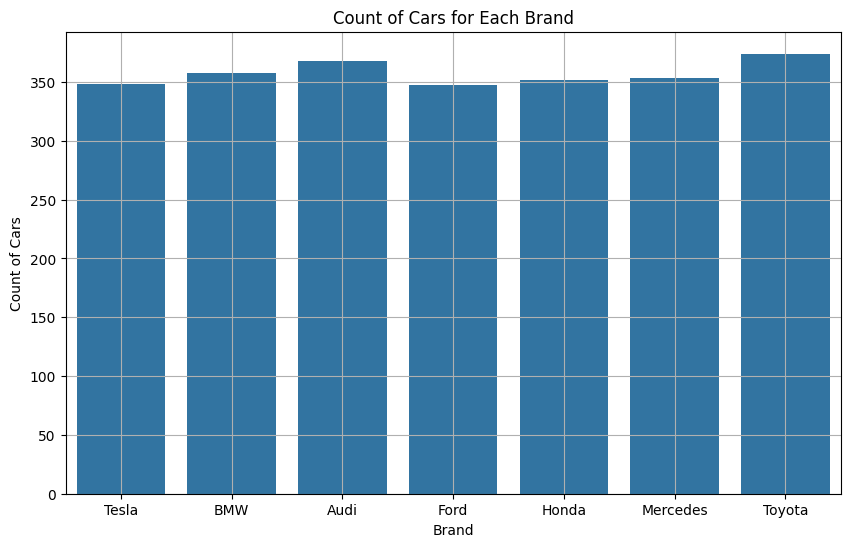

In [113]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Brand', data=df)

plt.title('Count of Cars for Each Brand')
plt.xlabel('Brand')
plt.ylabel('Count of Cars')
plt.grid(True)

plt.show()


Q16. Use a heatmap to show the correlation between numeric columns (Year,
Engine Size, Mileage, Price).


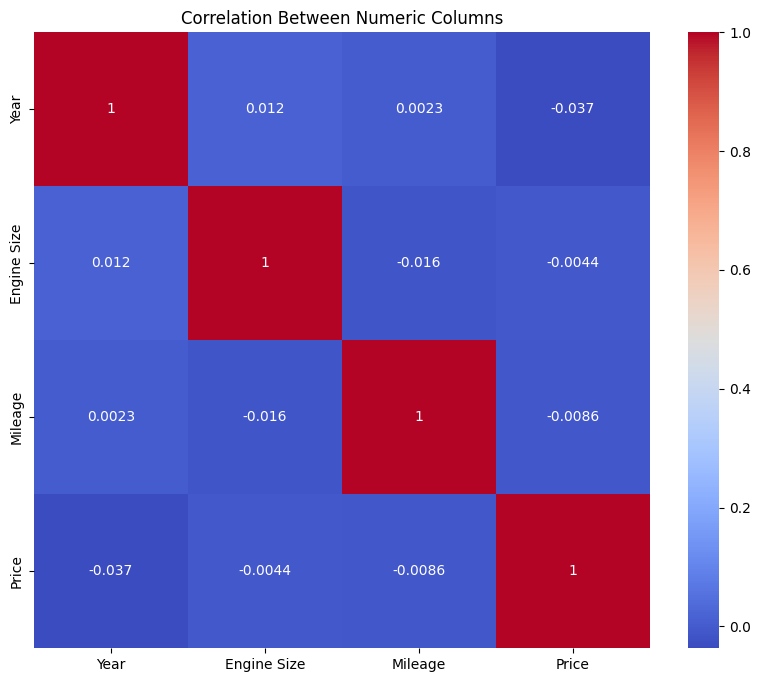

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df[['Year', 'Engine Size', 'Mileage', 'Price']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Between Numeric Columns')
plt.show()

Q14. Use a line plot to show the number of cars listed for sale each year.


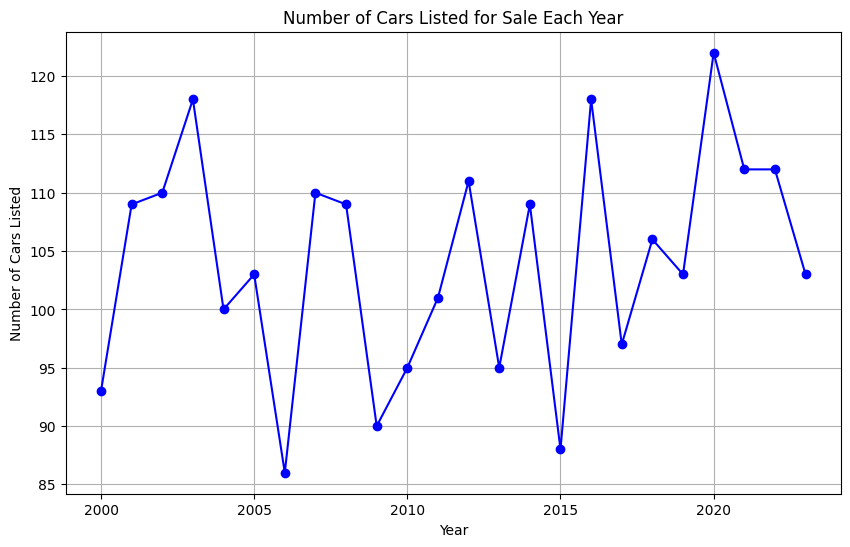

In [110]:
import matplotlib.pyplot as plt

cars_per_year = df.groupby('Year').size()

plt.figure(figsize=(10,6))
plt.plot(cars_per_year.index, cars_per_year.values, marker='o', linestyle='-', color='b')
plt.title('Number of Cars Listed for Sale Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Cars Listed')
plt.grid(True)
plt.show()

Q13. Use a bar chart to compare the average car price across different fuel
types.

In [107]:
df.head()

Car ID  Brand  Year  Engine Size Fuel Type Transmission  Mileage Condition  \
0       1  Tesla  2016          2.3    Petrol       Manual   114832       New   
1       2    BMW  2018          4.4  Electric       Manual   143190      Used   
2       3   Audi  2013          4.5  Electric       Manual   181601       New   
3       4  Tesla  2011          4.1    Diesel    Automatic    68682       New   
4       5   Ford  2009          2.6    Diesel       Manual   223009  Like New   

      Price     Model  
0  26613.92   Model X  
1  14679.61  5 Series  
2  44402.61        A4  
3  86374.33   Model Y  
4  73577.10   Mustang

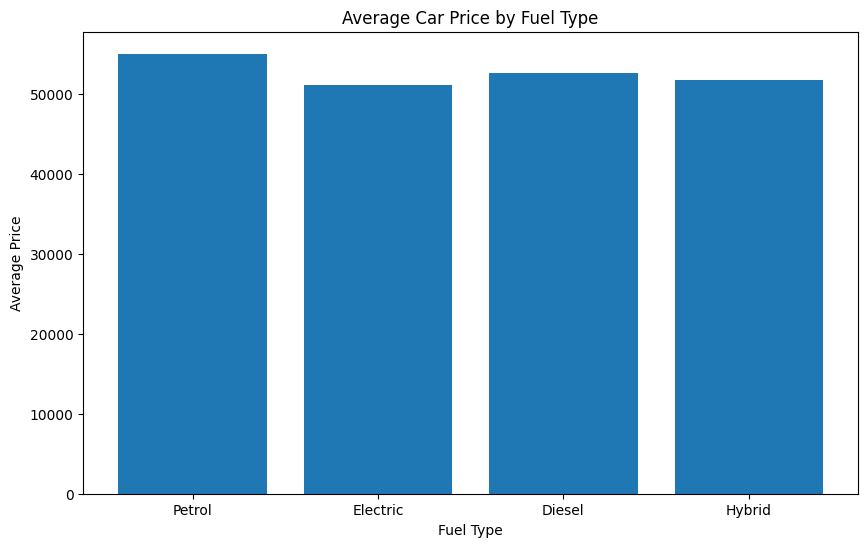

In [109]:
import matplotlib.pyplot as plt
import pandas as pd

fuel_types = df['Fuel Type'].unique()
avg_prices = df.groupby('Fuel Type')['Price'].mean()

plt.figure(figsize=(10,6))
plt.bar(fuel_types, avg_prices)
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.title('Average Car Price by Fuel Type')
plt.show()